In [95]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import describe

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances

import sys
sys.path.append('../Data/fashion-mnist/utils')
import mnist_reader

In [166]:
def get_neighbours(index, data, epsilon, matrix):
    row = matrix[index] if matrix is not None else euclidean_distances(data[index].reshape(1, -1), data)
    n = np.where(row <= epsilon)[0]
    return list(set(n))

def dbscan(data, epsilon, minpts, matrix):
    
    clusters = np.empty(data.shape[0])
    clusters[:] = np.nan
    
    cluster_num = 0
    
    for j in range(data.shape[0]):
#         print('--'*5,j,'--'*10)
        
        if not np.isnan(clusters[j]):
            continue
        
        neighbours = get_neighbours(j, data, epsilon, matrix)

        if len(neighbours) < minpts:
            clusters[j] = -1  # noise
            continue
    
        print('o loop: ', j, 'nan cnt: ', len(np.where(np.isnan(clusters))[0]))
        _unique, _counts = np.unique(ngclusters, return_counts=True)
        print(dict(zip(_unique, _counts)))
        
        cluster_num += 1
        clusters[j] = cluster_num
        
        nn = list(set(neighbours) - set([j]))
        
        for i in nn:
            print('i loop: ', i, 'nan cnt: ', len(np.where(np.isnan(clusters))[0]))
                
            if clusters[i] == -1:
                clusters[i] = cluster_num
                continue
                
            if not np.isnan(clusters[i]):
                continue
            
            clusters[i] = cluster_num
            
            new_neighbours = get_neighbours(i, data, epsilon, matrix)
            if len(new_neighbours) >= minpts:
                nn.extend(new_neighbours)
    return clusters

def plot(df):
    clusters = set(df.cluster.tolist())
    for c in clusters:
        tmp = df[df['cluster'] == c]
        plt.plot(tmp.x, tmp.y, 'o')

In [124]:
G = lambda cm: [
    1 - np.sum(
        [(np.square(
            cm[i, j] / (np.sum(cm[:, j]) if np.sum(cm[:, j]) > 0 else 1))
         ) for i in range(cm.shape[0])]
    ) for j in range(cm.shape[1])]
gini = lambda cm: np.sum(np.multiply(G(cm), np.sum(cm, axis=0))) / np.sum(cm)
purity = lambda cm, tar: np.sum(np.amax(cm, axis=0)) / tar.shape[0]

def params(clusters, targets):
    cm = confusion_matrix(targets, clusters)
    pur = purity(cm, targets)
    gin = gini(cm)
    print("Purity: ", pur)
    print("Gini index: ", gin)
    return pur, gin

## 20 news group

In [16]:
ng = fetch_20newsgroups(subset='all', data_home='../Data')
vectorizer = TfidfVectorizer(stop_words="english", min_df=5, max_df=0.7)
ngvectors = vectorizer.fit_transform(ng.data)

In [17]:
ng_matrix = euclidean_distances(ngvectors)

In [26]:
# e = 1.226
# c = 45

epsilons = np.arange(0.9, 1.3, 0.1)
cnts = np.arange(15, 50, 1)
ps = list()
gs = list()
xs = list()
ys = list()

for e in epsilons:
    for c in cnts:
        ngclusters = dbscan(ngvectors, e, c, ng_matrix)
        unique, counts = np.unique(ngclusters, return_counts=True)
        print('-'*20)
        print(e, c)
        print(dict(zip(unique, counts)))
        _purity, _gini = params(ngclusters, ng.target)
        
        xs.append(e)
        ys.append(c)
        ps.append(_purity)
        gs.append(_gini)

--------------------
0.9 15
{-1.0: 18651, 1.0: 21, 2.0: 25, 3.0: 20, 4.0: 17, 5.0: 19, 6.0: 22, 7.0: 18, 8.0: 15, 9.0: 23, 10.0: 15}
Purity:  0.0614453995543
Gini index:  0.941789838392
--------------------
0.9 16
{-1.0: 18698, 1.0: 21, 2.0: 20, 3.0: 19, 4.0: 22, 5.0: 25, 6.0: 18, 7.0: 23}
Purity:  0.0590576249602
Gini index:  0.944167054618
--------------------
0.9 17
{-1.0: 18700, 1.0: 21, 2.0: 20, 3.0: 19, 4.0: 22, 5.0: 23, 6.0: 18, 7.0: 23}
Purity:  0.0589515016449
Gini index:  0.944267661522
--------------------
0.9 18
{-1.0: 18723, 1.0: 21, 2.0: 19, 3.0: 22, 4.0: 18, 5.0: 20, 6.0: 23}
Purity:  0.057731083519
Gini index:  0.945423096047
--------------------
0.9 19
{-1.0: 18762, 1.0: 21, 2.0: 20, 3.0: 20, 4.0: 23}
Purity:  0.056086172132
Gini index:  0.94688681549
--------------------
0.9 20
{-1.0: 18783, 1.0: 20, 2.0: 23, 3.0: 20}
Purity:  0.0556086172132
Gini index:  0.947244089145
--------------------
0.9 21
{-1.0: 18823, 1.0: 23}
Purity:  0.0542290141144
Gini index:  0.94834159

--------------------
1.0 46
{-1.0: 18794, 1.0: 52}
Purity:  0.0557147405285
Gini index:  0.946983281726
--------------------
1.0 47
{-1.0: 18794, 1.0: 52}
Purity:  0.0557147405285
Gini index:  0.946983281726
--------------------
1.0 48
{-1.0: 18794, 1.0: 52}
Purity:  0.0557147405285
Gini index:  0.946983281726
--------------------
1.0 49
{-1.0: 18794, 1.0: 52}
Purity:  0.0557147405285
Gini index:  0.946983281726
--------------------
1.1 15
{-1.0: 15704, 1.0: 133, 2.0: 19, 3.0: 240, 4.0: 123, 5.0: 58, 6.0: 24, 7.0: 20, 8.0: 117, 9.0: 45, 10.0: 56, 11.0: 244, 12.0: 322, 13.0: 229, 14.0: 72, 15.0: 25, 16.0: 24, 17.0: 24, 18.0: 35, 19.0: 41, 20.0: 33, 21.0: 21, 22.0: 17, 23.0: 54, 24.0: 30, 25.0: 17, 26.0: 40, 27.0: 18, 28.0: 132, 29.0: 24, 30.0: 69, 31.0: 77, 32.0: 30, 33.0: 23, 34.0: 23, 35.0: 27, 36.0: 30, 37.0: 22, 38.0: 23, 39.0: 25, 40.0: 15, 41.0: 19, 42.0: 27, 43.0: 28, 44.0: 33, 45.0: 16, 46.0: 24, 47.0: 30, 48.0: 38, 49.0: 18, 50.0: 17, 51.0: 14, 52.0: 15, 53.0: 15, 54.0: 16, 55.

--------------------
1.1 36
{-1.0: 18175, 1.0: 92, 2.0: 77, 3.0: 60, 4.0: 63, 5.0: 63, 6.0: 82, 7.0: 68, 8.0: 65, 9.0: 62, 10.0: 39}
Purity:  0.0816618911175
Gini index:  0.924541862143
--------------------
1.1 37
{-1.0: 18195, 1.0: 92, 2.0: 60, 3.0: 63, 4.0: 63, 5.0: 76, 6.0: 82, 7.0: 65, 8.0: 53, 9.0: 58, 10.0: 39}
Purity:  0.0808129045951
Gini index:  0.925371444072
--------------------
1.1 38
{-1.0: 18198, 1.0: 92, 2.0: 60, 3.0: 63, 4.0: 76, 5.0: 61, 6.0: 82, 7.0: 64, 8.0: 53, 9.0: 58, 10.0: 39}
Purity:  0.0806537196222
Gini index:  0.925521276923
--------------------
1.1 39
{-1.0: 18202, 1.0: 92, 2.0: 60, 3.0: 62, 4.0: 76, 5.0: 58, 6.0: 82, 7.0: 64, 8.0: 53, 9.0: 58, 10.0: 39}
Purity:  0.0804945346493
Gini index:  0.925687464067
--------------------
1.1 40
{-1.0: 18254, 1.0: 91, 2.0: 58, 3.0: 74, 4.0: 53, 5.0: 80, 6.0: 61, 7.0: 64, 8.0: 53, 9.0: 58}
Purity:  0.077841451767
Gini index:  0.928149210738
--------------------
1.1 41
{-1.0: 18270, 1.0: 87, 2.0: 74, 3.0: 53, 4.0: 75, 5.0

--------------------
1.2 30
{-1.0: 14168, 1.0: 277, 2.0: 822, 3.0: 1397, 4.0: 266, 5.0: 150, 6.0: 250, 7.0: 326, 8.0: 192, 9.0: 93, 10.0: 52, 11.0: 49, 12.0: 98, 13.0: 110, 14.0: 34, 15.0: 47, 16.0: 62, 17.0: 65, 18.0: 52, 19.0: 95, 20.0: 41, 21.0: 31, 22.0: 47, 23.0: 25, 24.0: 36, 25.0: 31, 26.0: 30}
Purity:  0.177278998196
Gini index:  0.862741134915
--------------------
1.2 31
{-1.0: 14333, 1.0: 272, 2.0: 809, 3.0: 1374, 4.0: 150, 5.0: 254, 6.0: 243, 7.0: 305, 8.0: 185, 9.0: 93, 10.0: 46, 11.0: 49, 12.0: 98, 13.0: 105, 14.0: 34, 15.0: 60, 16.0: 65, 17.0: 52, 18.0: 64, 19.0: 39, 20.0: 31, 21.0: 47, 22.0: 36, 23.0: 41, 24.0: 31, 25.0: 30}
Purity:  0.172927942269
Gini index:  0.866145044357
--------------------
1.2 32
{-1.0: 14500, 1.0: 258, 2.0: 798, 3.0: 572, 4.0: 752, 5.0: 143, 6.0: 129, 7.0: 239, 8.0: 306, 9.0: 182, 10.0: 93, 11.0: 46, 12.0: 49, 13.0: 88, 14.0: 106, 15.0: 34, 16.0: 60, 17.0: 66, 18.0: 52, 19.0: 64, 20.0: 115, 21.0: 39, 22.0: 32, 23.0: 47, 24.0: 36, 25.0: 40}
Purity

Text(0.5,0,'X')

Text(0.5,0,'Y')

Text(0.5,0,'Purity')

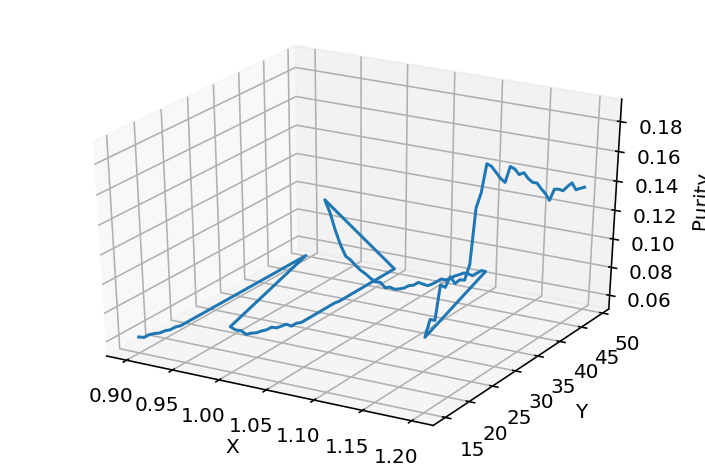

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, ys, ps)
# ax.plot(xs, ys, gs)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Purity')

plt.show()

In [38]:
# xs = [0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.1000000000000001, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
# ys = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
# ps = [0.061445399554282076, 0.05905762496020376, 0.058951501644911385, 0.057731083519049133, 0.056086172132017408, 0.05560861721320174, 0.054229014114400932, 0.054175952456754752, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.05300859598853868, 0.082033322721001806, 0.077682266794014646, 0.075241430542290141, 0.070518943011779689, 0.069351586543563618, 0.067547490183593337, 0.066751565318900558, 0.065531147193038305, 0.065318900562453569, 0.062825002653082884, 0.062082139446036293, 0.061286214581343521, 0.057943330149633876, 0.057943330149633876, 0.0564576037355407, 0.056404542077894512, 0.056404542077894512, 0.056404542077894512, 0.056404542077894512, 0.056404542077894512, 0.056404542077894512, 0.056404542077894512, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.055714740528494108, 0.17871166295235064, 0.16857688634192933, 0.15531147193038311, 0.14385015387880717, 0.1346704871060172, 0.1300541228907991, 0.12453571049559588, 0.11938872970391595, 0.11503767377692879, 0.11015600127347978, 0.10580494534649262, 0.10357635572535286, 0.097898758357211083, 0.096359970285471719, 0.092857900880823518, 0.09121298949379178, 0.089886448052637166, 0.089568078106760055, 0.08792316671972833, 0.087870105062082135, 0.084792528918603421, 0.081661891117478513, 0.080812904595139554, 0.080653719622200998, 0.080494534649262442, 0.077841451766953201, 0.077151650217552797, 0.076833280271675686, 0.07577204711875199, 0.075082245569351586, 0.072588347659980901, 0.069192401570625062, 0.0690862782553327, 0.069033216597686506, 0.06648625703066964, 0.10161307439244402, 0.11148254271463441, 0.10882945983232516, 0.13037249283667621, 0.12671123845908946, 0.1318051575931232, 0.12538469701793484, 0.12586225193675049, 0.12373978563090311, 0.13212352753900031, 0.16714422158548234, 0.17526265520534862, 0.19192401570625067, 0.18852806961689483, 0.18290353390639924, 0.17727899819590365, 0.17292794226891647, 0.18147086914995225, 0.17807492306059641, 0.17271569563833175, 0.17223814071951607, 0.16666666666666666, 0.16236867239732569, 0.16014008277618594, 0.15456860872333653, 0.14952775124694895, 0.14321341398705295, 0.14889101135519472, 0.14708691499522444, 0.14427464713997665, 0.14533588029290034, 0.14602568184230075, 0.13960522126711239, 0.13875623474477342, 0.13774806324949593]
# gs = [0.94178983839247987, 0.94416705461822992, 0.944267661521627, 0.94542309604690444, 0.94688681549009179, 0.94724408914518921, 0.94834159669352602, 0.94839188336592128, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.94949684000175272, 0.92381964466630562, 0.92770638378623294, 0.92990549132519551, 0.93406521535245801, 0.93500024274665916, 0.93667667788631548, 0.93733216185604373, 0.93843685602384508, 0.9386290535333488, 0.94111156225105352, 0.94180515708443457, 0.94215161172405937, 0.9450467398805964, 0.9450467398805964, 0.94645400798114743, 0.9464720321175677, 0.9464720321175677, 0.9464720321175677, 0.9464720321175677, 0.94650336193201268, 0.94650336193201268, 0.94650336193201268, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.94698328172638546, 0.84509907659573147, 0.85251127531056781, 0.86258689969187052, 0.87370224410467401, 0.88112975803299642, 0.88418481731136689, 0.88890670127697946, 0.89271029634343846, 0.89669048460160605, 0.89972399716042417, 0.9033483683697261, 0.90517263207469201, 0.91040219933463362, 0.91155837024326991, 0.91461394014150088, 0.91631193213029805, 0.91754713667731236, 0.91778780734076393, 0.91900270944640405, 0.91905331885591923, 0.92176790491774352, 0.92454186214299594, 0.92537144407186733, 0.92552127692304986, 0.92568746406670799, 0.92814921073789658, 0.928844805321001, 0.92903551539469564, 0.92994422023743339, 0.93046971782470256, 0.93272342507001305, 0.93548642304810459, 0.93558750492799692, 0.9356380371241052, 0.93805408592295081, 0.92192168142178887, 0.91347452638175886, 0.91524863625870634, 0.89609930650557579, 0.89963335187887561, 0.89373316966796879, 0.89788043950815677, 0.89759908624378271, 0.89897357593343041, 0.89313248899721465, 0.87289278807259374, 0.86641768271748132, 0.85207340978458601, 0.85257482798997875, 0.85762986336098135, 0.8627411349148203, 0.86614504435663031, 0.8589107739867381, 0.85984326935789468, 0.86316538175172519, 0.8630559017438546, 0.86674141255010884, 0.8703563577644039, 0.86988415904326843, 0.8747622129075151, 0.87809086723770358, 0.88298234880759652, 0.87794621970617714, 0.87886860521734111, 0.88150749586135591, 0.87937572585985035, 0.87408196193174803, 0.87923399650242995, 0.8798929194166264, 0.88072348845692416]

## Fashion

In [5]:
fashion_X, fashion_y = mnist_reader.load_mnist('../Data/fashion-mnist/data/fashion')

In [47]:
fxs = np.split(fashion_X, 10)
fys = np.split(fashion_y, 10)
fcds = [0 for i in range(10)]

In [48]:
for i in range(10):
    fcds[i] = cosine_distances(fxs[i])
    np.unique(fys[i], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([560, 643, 608, 612, 584, 594, 590, 617, 590, 602]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([562, 577, 593, 600, 597, 610, 654, 575, 605, 627]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([622, 601, 593, 600, 585, 603, 601, 624, 574, 597]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([604, 600, 598, 620, 599, 608, 627, 610, 567, 567]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([597, 594, 597, 585, 595, 615, 609, 595, 636, 577]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([622, 588, 570, 620, 598, 589, 574, 586, 626, 627]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([618, 574, 562, 565, 621, 599, 598, 637, 633, 593]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([579, 617, 647, 594, 606, 588, 598, 576, 589, 606]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([606, 622, 630, 599, 582, 603, 584, 625, 564, 585]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([630, 584, 602, 605, 633, 591, 565, 555, 616, 619]))

In [54]:
for i in range(10):
    describe(fcds[i], axis=0)
    

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.78350414,  0.82345411,  0.87939079, ...,  0.90043633,
        0.98786326,  0.87213346])), mean=array([ 0.37537934,  0.35062318,  0.38670251, ...,  0.51194353,
        0.56469608,  0.34418213]), variance=array([ 0.01559412,  0.02749736,  0.03602906, ...,  0.01837399,
        0.02076981,  0.03821116]), skewness=array([-0.0766567 ,  0.48975193,  0.42919204, ...,  0.45505473,
       -1.07078751,  0.55232642]), kurtosis=array([-0.4389718 , -0.6307703 , -1.04948971, ..., -0.8648573 ,
        1.07855436, -0.87739943]))

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.83920905,  0.76869296,  0.77961715, ...,  0.75150084,
        0.80715625,  0.79038011])), mean=array([ 0.43009973,  0.29433952,  0.31541034, ...,  0.38443564,
        0.29982605,  0.33395647]), variance=array([ 0.01315203,  0.024255  ,  0.02065226, ...,  0.01182417,
        0.02559171,  0.01882516]), skewness=array([ 0.41400648,  0.38695039,  0.14456632, ..., -0.20422058,
        0.63295675,  0.10881101]), kurtosis=array([-0.42240927, -0.60713874, -0.66075464, ...,  0.24857197,
       -0.42923923, -0.44895724]))

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.79278106,  0.83215433,  0.94041922, ...,  0.83307053,
        0.96283814,  0.84416779])), mean=array([ 0.30187603,  0.32197617,  0.48164437, ...,  0.31468328,
        0.69815028,  0.32889248]), variance=array([ 0.02773078,  0.02128593,  0.04091928, ...,  0.03070304,
        0.01219413,  0.03350656]), skewness=array([ 0.60202878,  0.43132167,  0.10411632, ...,  0.62427144,
       -0.99122243,  0.60591891]), kurtosis=array([-0.6129374 , -0.30670807, -1.0232699 , ..., -0.66501812,
        0.98914009, -0.74251239]))

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.70650725,  0.77757177,  0.84995482, ...,  0.96622205,
        0.8361543 ,  0.84635351])), mean=array([ 0.29554658,  0.30730431,  0.44378585, ...,  0.57392245,
        0.29904142,  0.49429762]), variance=array([ 0.01815454,  0.02286891,  0.02238765, ...,  0.01423618,
        0.02942985,  0.01620671]), skewness=array([ 0.41991177,  0.19710359,  0.51059733, ..., -0.26595212,
        0.6491342 , -0.03004288]), kurtosis=array([-0.65681102, -0.6189026 , -0.80455162, ..., -0.33550119,
       -0.65243057, -0.31629944]))

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.86036343,  0.87802946,  0.79341229, ...,  0.93434243,
        0.73873509,  0.77604668])), mean=array([ 0.42928862,  0.44855256,  0.35975813, ...,  0.45758149,
        0.33076831,  0.35382335]), variance=array([ 0.01961361,  0.02037485,  0.02452182, ...,  0.02136511,
        0.0159116 ,  0.01249526]), skewness=array([-0.43152775, -0.4096521 ,  0.40343407, ..., -0.39954102,
        0.53154738,  0.19666464]), kurtosis=array([-0.17625973, -0.06689638, -0.84580171, ..., -0.45345712,
       -0.39997875, -0.40665879]))

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.91814689,  0.88855851,  0.96339303, ...,  0.80782658,
        0.85061498,  0.75388419])), mean=array([ 0.37173253,  0.3793521 ,  0.5551048 , ...,  0.31435767,
        0.35921545,  0.2917826 ]), variance=array([ 0.03445508,  0.02441928,  0.02112824, ...,  0.02523285,
        0.0194654 ,  0.02501909]), skewness=array([ 0.37510232,  0.55720206, -1.05150337, ...,  0.66120943,
        0.18954369,  0.43991172]), kurtosis=array([-0.81805862, -0.52981679,  1.08831342, ..., -0.43649946,
       -0.15294748, -0.57671865]))

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.83646328,  0.81948327,  0.72226869, ...,  0.87045961,
        0.82626171,  0.93910041])), mean=array([ 0.35641362,  0.40519495,  0.34725362, ...,  0.4691788 ,
        0.41651267,  0.53921339]), variance=array([ 0.01734606,  0.0183557 ,  0.01283219, ...,  0.01824459,
        0.02101757,  0.0227134 ]), skewness=array([ 0.29794333,  0.09596238,  0.29140579, ..., -0.21078555,
       -0.23279948, -1.0271296 ]), kurtosis=array([-0.24442951, -0.53178538, -0.62390754, ..., -0.49524335,
       -0.54759478,  0.90457993]))

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.88755743,  0.82569498,  0.93366368, ...,  0.71055259,
        0.95343361,  0.79244687])), mean=array([ 0.43020974,  0.31711039,  0.37620937, ...,  0.28098474,
        0.52583723,  0.31325151]), variance=array([ 0.02276622,  0.02741565,  0.0382908 , ...,  0.02314329,
        0.02068404,  0.02501412]), skewness=array([-0.41640741,  0.63775192,  0.49262848, ...,  0.34985258,
       -0.66606119,  0.64962055]), kurtosis=array([-0.3862076 , -0.55895468, -0.98019789, ..., -0.63469742,
       -0.20238445, -0.46164888]))

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.83813578,  0.95374159,  0.86472962, ...,  0.89169806,
        0.87808803,  0.78966805])), mean=array([ 0.44490108,  0.53292403,  0.34413656, ...,  0.51545693,
        0.34602359,  0.36511339]), variance=array([ 0.00965293,  0.01856677,  0.03123825, ...,  0.0191644 ,
        0.03813053,  0.00972357]), skewness=array([ 0.43783931, -1.03482164,  0.61772054, ...,  0.06772896,
        0.57202561,  0.62548129]), kurtosis=array([ 0.50571412,  1.005648  , -0.60290022, ..., -0.75073352,
       -0.8594929 ,  1.12055082]))

DescribeResult(nobs=6000, minmax=(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.97308248,  0.74852009,  0.8871524 , ...,  0.86701834,
        0.79224619,  0.97215906])), mean=array([ 0.56069713,  0.29605129,  0.40319933, ...,  0.38279743,
        0.35910687,  0.60364978]), variance=array([ 0.02247016,  0.02517624,  0.02968572, ...,  0.03020196,
        0.02141651,  0.01694252]), skewness=array([-0.94252593,  0.55461339,  0.29228505, ...,  0.49302053,
        0.50865382, -0.42634849]), kurtosis=array([ 0.60697622, -0.60800469, -0.71365072, ..., -0.83191491,
       -0.59048658, -0.24623193]))

In [60]:
fe = 0.02
fc = 19

fclusters = [0 for i in range(10)]

for i in range(10):
    fclusters[i] = dbscan(fxs[i], fe, fc, fcds[i])
    unique, counts = np.unique(fclusters[i], return_counts=True)
    print('-'*20)
    print(dict(zip(unique, counts)))
    p, g = params(fclusters[i], fys[i])

--------------------
{-1.0: 6000}
Purity:  0.107166666667
Gini index:  0.899876611111
--------------------
{-1.0: 6000}
Purity:  0.109
Gini index:  0.8998215
--------------------
{-1.0: 5976, 1.0: 24}
Purity:  0.108
Gini index:  0.896330265506
--------------------
{-1.0: 6000}
Purity:  0.1045
Gini index:  0.899903
--------------------
{-1.0: 6000}
Purity:  0.106
Gini index:  0.899931666667
--------------------
{-1.0: 5971, 1.0: 29}
Purity:  0.109166666667
Gini index:  0.895790660607
--------------------
{-1.0: 6000}
Purity:  0.106166666667
Gini index:  0.899816055556
--------------------
{-1.0: 5966, 1.0: 34}
Purity:  0.1135
Gini index:  0.894794502179
--------------------
{-1.0: 5981, 1.0: 19}
Purity:  0.108166666667
Gini index:  0.897048431143
--------------------
{-1.0: 6000}
Purity:  0.1055
Gini index:  0.899827166667


In [58]:
fashion_matrix = cosine_distances(fashion_X)

In [63]:
fashion_matrix.shaped

(60000, 60000)

In [67]:
fashion_X.shape

(60000, 784)

In [68]:
fashion_clusters = dbscan(fashion_X, 0.026, 19, fashion_matrix)
unique, counts = np.unique(fashion_clusters, return_counts=True)
print(dict(zip(unique, counts)))
p, g = params(fashion_clusters, fashion_y)

{-1.0: 45430, 1.0: 2300, 2.0: 7251, 3.0: 3661, 4.0: 997, 5.0: 234, 6.0: 25, 7.0: 21, 8.0: 23, 9.0: 21, 10.0: 20, 11.0: 17}
Purity:  0.262733333333
Gini index:  0.772305869565


## Household

In [83]:
with open('../Data/household_power_consumption.txt') as f:
    names = f.readline().strip().split(';')
    print(names)
    hdata = []
    count = 0
    for line in f.readlines():
        line = line.strip().split(';')[2:]
        if '?' in line:
            continue
        line = list(map(float, line))
        hdata.append(line)
    hdata = np.matrix(hdata)

['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


In [87]:
describe(hdata)
print(hdata.shape)

DescribeResult(nobs=2049280, minmax=(array([  7.60000000e-02,   0.00000000e+00,   2.23200000e+02,
         2.00000000e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00]), array([  11.122,    1.39 ,  254.15 ,   48.4  ,   88.   ,   80.   ,   31.   ])), mean=array([  1.09161504e+00,   1.23714476e-01,   2.40839858e+02,
         4.62775931e+00,   1.12192331e+00,   1.29851997e+00,
         6.45844736e+00]), variance=array([  1.11787094e+00,   1.27062447e-02,   1.04975137e+01,
         1.97526581e+01,   3.78597916e+01,   3.38959923e+01,
         7.11855661e+01]), skewness=array([ 1.78623208,  1.26191327, -0.32666474,  1.84909855,  5.94453693,
        7.09054804,  0.72468779]), kurtosis=array([  4.21867187,   2.60562348,   0.72470232,   4.6012287 ,
        35.64290279,  57.90719939,  -1.28219733]))

(2049280, 7)


In [97]:
stdscaler = StandardScaler()
scaled_hdata = stdscaler.fit_transform(hdata)

In [122]:
scaled_hdata

array([[ 2.95507706,  2.61072061, -1.85181608, ..., -0.18233673,
        -0.05127425,  1.24942076],
       [ 4.03708463,  2.77040557, -2.2252745 , ..., -0.18233673,
        -0.05127425,  1.13089735],
       [ 4.05032598,  3.32043153, -2.33021323, ..., -0.18233673,
         0.12048729,  1.24942076],
       ..., 
       [-0.14529076, -1.09751893, -0.31477235, ..., -0.18233673,
        -0.22303579, -0.7654772 ],
       [-0.149074  , -1.09751893, -0.35180955, ..., -0.18233673,
        -0.22303579, -0.7654772 ],
       [-0.15096563, -1.09751893, -0.39810605, ..., -0.18233673,
        -0.22303579, -0.7654772 ]])

(array([ 1327865.,     5805.,     5887.,    31317.,     6530.,   525587.,
          126722.,     2078.,     2797.,    14692.]),
 array([-0.7654772 , -0.39805463, -0.03063206,  0.33679051,  0.70421307,
         1.07163564,  1.43905821,  1.80648078,  2.17390335,  2.54132591,
         2.90874848]),
 <a list of 10 Patch objects>)

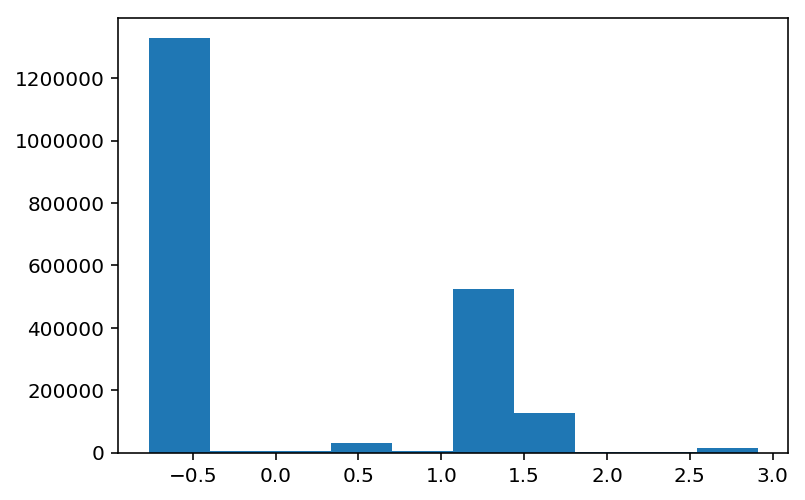

In [158]:
# plt.hist(scaled_hdata[:,0])
# plt.hist(scaled_hdata[:,1])
# plt.hist(scaled_hdata[:,2], bins=50)
# plt.hist(scaled_hdata[:,3])
# plt.hist(scaled_hdata[:,4])
# plt.hist(scaled_hdata[:,5], bins=50)
plt.hist(scaled_hdata[:,6])

In [167]:
rnd = np.random.RandomState(2)
sample = rnd.permutation(shuffled_hdata)
hxs = np.split(sample, 40)

# # from sklearn.utils import shuffle

# # shuffled_hdata = shuffle(scaled_hdata)
# hxs = np.split(shuffled_hdata, 40)

In [168]:
hcls = [dbscan(hxs[i], 0.4, 1000, None) for i in range(3)]

In [169]:
[np.unique(hcls[i], return_counts=True) for i in range(3)]

[(array([-1.]), array([51232])),
 (array([-1.]), array([51232])),
 (array([-1.]), array([51232]))]

In [132]:
x = np.array([-0.69953589,  0.74772945,  0.40436658, -0.6812534,  -0.18233673, -0.05127425,
 -0.64695379])
print(x.shape)
print(x.reshape(1, -1))
print(x.reshape(1, -1).shape)

(7,)
[[-0.69953589  0.74772945  0.40436658 -0.6812534  -0.18233673 -0.05127425
  -0.64695379]]
(1, 7)
